# Sales Analysis

#### Import necessary libraries

In [ ]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [ ]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [ ]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.tail()

### Clean up the data!


##### Drop rows of NAN

In [ ]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

##### Get rid of text in order date column

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

#### Add month column (alternative method)

In [8]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month 2  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4

#### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data["Price Each"] =  (all_data["Price Each"])  * 4.1 #converted into MYR
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2      48.995   
2   176559  Bose SoundSport Headphones                 1     409.959   
3   176560                Google Phone                 1    2460.000   
4   176560            Wired Headphones                 1      49.159   
5   176561            Wired Headphones                 1      49.159   

       Order Date                      Purchase Address  Month  Month 2  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4   

                City  
0       Dallas  (TX)  
2       Boston  (MA)  
3  Los Angeles  (CA)  
4  Los Angeles  (CA)  
5  Los Angeles  (CA)

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [11]:
all_data.groupby(['Month']).sum()

Quantity Ordered    Price Each  Month 2         Sales
Month                                                       
1                 10903  7.428250e+06     9709  7.471253e+06
2                 13449  8.974427e+06    23950  9.028292e+06
3                 17005  1.144395e+07    45459  1.150911e+07
4                 20558  1.380745e+07    73116  1.390175e+07
5                 18667  1.285401e+07    82830  1.292569e+07
6                 15253  1.050431e+07    81324  1.056899e+07
7                 16072  1.079341e+07   100051  1.085588e+07
8                 13448  9.144416e+06    95688  9.202318e+06
9                 13109  8.548468e+06   104589  8.599997e+06
10                22703  1.523377e+07   202820  1.532058e+07
11                19798  1.304046e+07   193303  1.311837e+07
12                28114  1.881250e+07   299808  1.891512e+07

range(1, 13)


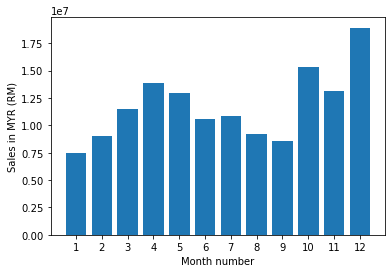

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in MYR (RM)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [13]:
all_data.groupby(['City']).sum()

Quantity Ordered    Price Each   Month  Month 2  \
City                                                                   
Atlanta  (GA)                   16602  1.139762e+07  104794   104794   
Austin  (TX)                    11153  7.420482e+06   69829    69829   
Boston  (MA)                    22528  1.491338e+07  141112   141112   
Dallas  (TX)                    16730  1.128577e+07  104620   104620   
Los Angeles  (CA)               33289  2.222788e+07  208325   208325   
New York City  (NY)             27932  1.900502e+07  175741   175741   
Portland  (ME)                   2750  1.833476e+06   17144    17144   
Portland  (OR)                  11303  7.628289e+06   70621    70621   
San Francisco  (CA)             50239  3.366699e+07  315520   315520   
Seattle  (WA)                   16553  1.120651e+07  104941   104941   

                            Sales  
City                               
Atlanta  (GA)        1.146154e+07  
Austin  (TX)         7.460285e+06  
Boston  (MA)         1.501273e+07  
Dallas  (TX)         1.134870e+07  
Los Angeles  (CA)    2.235554e+07  
New York City  (NY)  1.912370e+07  
Portland  (ME)       1.844009e+06  
Portland  (OR)       7.670003e+06  
San Francisco  (CA)  3.387504e+07  
Seattle  (WA)        1.126580e+07

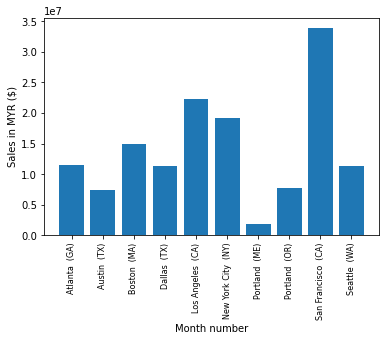

In [14]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in MYR ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [49]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2      48.995   
2   176559  Bose SoundSport Headphones                 1     409.959   
3   176560                Google Phone                 1    2460.000   
4   176560            Wired Headphones                 1      49.159   
5   176561            Wired Headphones                 1      49.159   

       Order Date                      Purchase Address  Month  Month 2  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4   

                City     Sales  Hour  Minute  Count  
0       Dallas  (TX)    97.990     8      46      1  
2       Boston  (MA)   409.959    22      30      1  
3  Los Angeles  (CA)  2460.000    14      38      1  
4  Los Angeles  (CA)    49.159    14      38      1  
5  Los Angeles  (CA)    49.159     9      27      1

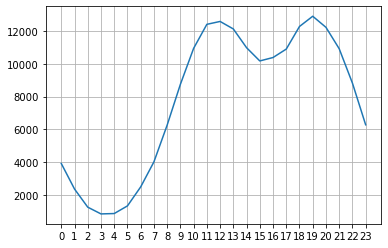

In [50]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [51]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

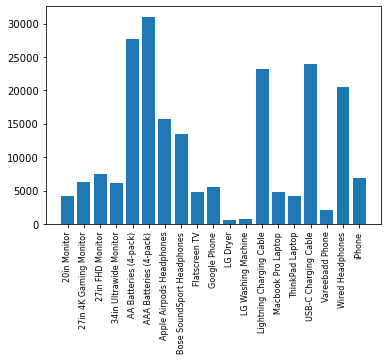

In [53]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\OEM\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


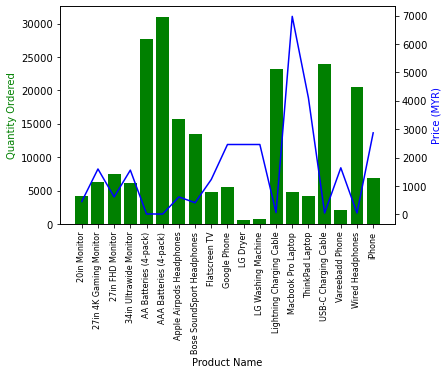

In [54]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price (MYR)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

 ## ML implementation (Supervised Learning) using Linear Regression Algorithm to predict whats the item based on quantity ordered & sales ? Problem not clear !

In [38]:
import sklearn
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import numpy as np

In [48]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2      48.995   
2   176559  Bose SoundSport Headphones                 1     409.959   
3   176560                Google Phone                 1    2460.000   
4   176560            Wired Headphones                 1      49.159   
5   176561            Wired Headphones                 1      49.159   

       Order Date                      Purchase Address  Month  Month 2  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4   

                City     Sales  Hour  Minute  Count  
0       Dallas  (TX)    97.990     8      46      1  
2       Boston  (MA)   409.959    22      30      1  
3  Los Angeles  (CA)  2460.000    14      38      1  
4  Los Angeles  (CA)    49.159    14      38      1  
5  Los Angeles  (CA)    49.159     9      27      1

In [40]:
## Determine what features will affects the label (product)
feature = all_data[["Product","Quantity Ordered", "Sales"]]
feature.reset_index(drop=True, inplace=True)
feature.head()

Product  Quantity Ordered     Sales
0        USB-C Charging Cable                 2    97.990
1  Bose SoundSport Headphones                 1   409.959
2                Google Phone                 1  2460.000
3            Wired Headphones                 1    49.159
4            Wired Headphones                 1    49.159

In [41]:
all_data.loc[all_data["Product"] == "Lightning Charging Cable"] ##convert string into float == classify products name = INT (preprosessing)

Order ID                   Product  Quantity Ordered  Price Each  \
12       176568  Lightning Charging Cable                 1      61.295   
15       176571  Lightning Charging Cable                 1      61.295   
36       176589  Lightning Charging Cable                 1      61.295   
40       176593  Lightning Charging Cable                 2      61.295   
46       176599  Lightning Charging Cable                 1      61.295   
...         ...                       ...               ...         ...   
186805   259315  Lightning Charging Cable                 1      61.295   
186807   259317  Lightning Charging Cable                 1      61.295   
186819   259329  Lightning Charging Cable                 1      61.295   
186825   259335  Lightning Charging Cable                 1      61.295   
186839   259348  Lightning Charging Cable                 1      61.295   

            Order Date                       Purchase Address  Month  Month 2  \
12      04/15/19 12:18          438 Elm St, Seattle, WA 98101      4        4   
15      04/19/19 14:29      253 Johnson St, Atlanta, GA 30301      4        4   
36      04/04/19 12:23     846 Highland St, Atlanta, GA 30301      4        4   
40      04/15/19 13:45         906 7th St, Portland, OR 97035      4        4   
46      04/11/19 15:25  279 Maple St, New York City, NY 10001      4        4   
...                ...                                    ...    ...      ...   
186805  09/29/19 16:20           112 5th St, Boston, MA 02215      9        9   
186807  09/26/19 21:12    151 1st St, New York City, NY 10001      9        9   
186819  09/05/19 19:00      480 Lincoln St, Atlanta, GA 30301      9        9   
186825  09/26/19 17:21       791 Forest St, Seattle, WA 98101      9        9   
186839  09/30/19 21:03        260 Spruce St, Boston, MA 02215      9        9   

                       City    Sales  Hour  Minute  Count  
12            Seattle  (WA)   61.295    12      18      1  
15            Atlanta  (GA)   61.295    14      29      1  
36            Atlanta  (GA)   61.295    12      23      1  
40           Portland  (OR)  122.590    13      45      1  
46      New York City  (NY)   61.295    15      25      1  
...                     ...      ...   ...     ...    ...  
186805         Boston  (MA)   61.295    16      20      1  
186807  New York City  (NY)   61.295    21      12      1  
186819        Atlanta  (GA)   61.295    19       0      1  
186825        Seattle  (WA)   61.295    17      21      1  
186839         Boston  (MA)   61.295    21       3      1  

[21658 rows x 13 columns]

In [42]:
##convert string into float == classify products name = INT (preprosessing)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()



product = le.fit_transform(all_data["Product"]) ## convert all products into INT without knowing INT points to which product


In [43]:
Y = list(product)

In [74]:
predict = "Product"

X = np.array(feature.drop([predict],1)) ##feature | dropping predict and set it to Y
Y = list(product) ##label

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size= 0.2, random_state = 42)

In [75]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
accuracy = linear.score(x_test, y_test)
accuracy

0.026778374659144455

In [76]:
print("Coef:" , linear.coef_)
print("Intercept:" , linear.intercept_)

Coef: [-1.18908310e+00  4.83766425e-04]
Intercept: 10.105189985626954


In [77]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print("predicted value", predictions[x], "feature value", x_test[x], "real product value", y_test[x])

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 5.372579543610314 feature value [ 4.    49.036] real product value 5
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.11443128231998 feature

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.74225661660044 featur

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1. 

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 7.73888476461863

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.923723301113696 feature val

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature 

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.738884764618634 fe

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 

predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value

predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.9220373751227

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted valu

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.213623233855355 feature

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature valu

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 

predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 12.287

predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12.287958864325873 feature value [1.00e+00 

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.322056482083758 feature value [   2. 1230.] real product value 6
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.669795138146913 feature value 

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 5.372579543610314 feature value [ 4.    49.036] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value 

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 8.939888356202944 feature val

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213623233855355 feature val

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.106172287862925 f

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.9398090185092

predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.134265705742372 feature value [  1.    4

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301

predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213603399431934 featur

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.669795138146913 feature value [1.000000e+0

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.939888356202944 feature v

predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.689629561569303 feature 

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature v

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.922037375122795 feature value [ 1.   

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 6.560789932087183 feature value [ 3.    47.232] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.945759345535972 feat

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.939809018509255 fea

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 5.372579543610314 feature value [ 4.

predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939809018509255 feature

predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.945759345535972 feature v

predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    6

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295]

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.11443128231998 featur

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.922037375122795 feature value [ 1. 

predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 featu

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 12.287958864325873 feature val

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 5.379323247573927 feature value [ 4.    62.976] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1. 

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature va

predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.945759345535972 fea

predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted val

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.2136033994319

predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 7.74225661660044 featu

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 7.738884764618634 feature val

predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.213603399431934 feature val

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.73888476461

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature value [  1. 615.] r

predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.92372330111369

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213623233855355 feature value [  1.

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 7.74225661660044 feature val

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 6.560789932087183 feature value [ 3.    47.232] real product value 4
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.89952939033512 feature value [1.0000

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 10.107154590098897 feature value [2.00e+00 4.92e+03] real product value 9
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.213623233855355 feature value [  1. 615.]

predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.9398883562029

predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [ 

predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 6.6092850973549275 feature value [  3.    147.477] real product value 17
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 6.626898065354011 feature value [  3.    183.885] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.106172287862925 feature v

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 10.30451652208683

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.134265705742372 featu

predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 5.372579543610314 feature value [ 4.    49.036] real product value 5
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.945759345

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.134265705742372 feature value [  1.    450.959

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
pr

predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.30451652208683 feature value [1.00e+0

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.213623233855355 feature valu

predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 6.555732154114474 feature value [ 3.    36.777] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.511139585191213

predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature val

predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.939888356202944 feature value [ 1. 

predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.92203737

predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 fe

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.213623233855355 featu

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.89952939033512 feature valu

predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.922037375122795 feature valu

predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.922037375122795 featu

predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213623233855355 feature valu

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.922037375122795 feature value [ 1

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.939809018509255 feature value [ 1. 

predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.945759345535972 feature value 

predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 7.774586726778937 feature value [ 2.    98.318] real product value 17
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.709483819415116 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 8.3220564820

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 7.774428051391558 feature value [ 2.   97.99] real product value 15
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 7.738884764618634 feature value [ 2.    24.518] real product value 5
predicted value 10.89952939033512 feature value [1.000000

predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.923723301113696 feature value [ 1

predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 9.213603399431934 feature value [  1.    614.959] real product value 2
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.922037375122795 feature value [ 1.    12.259] real product value 5
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 5.372579543610314 feature value [ 4.    49.036] real product value 5
predicted value 8.939809018509255 fe

predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.511139585191213 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 9.213623233855355 feature value [  1. 615.] real product value 6
predicted value 7.7863287054449914 feature value [  2.   122.59] real product value 12
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 9.689629561569303 feature value [1.0

predicted value 9.689629561569303 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.106172287862925 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939888356202944 feature value [ 1.    49.159] real product value 17
predicted value 10.30451652208683 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 8.945759345535972 feature value [ 1.    61.295] real product value 12
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 8.923723301113696 feature value [ 1.    15.744] real product value 4
predicted value 9.21360339943

predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 7.74225661660044 feature value [ 2.    31.488] real product value 4
predicted value 4.189426933106153 feature value [ 5.    61.295] real product value 5
predicted value 12.287958864325873 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9.669795138146913 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 9.11443128231998 feature value [  1.    409.959] real product value 7
predicted value 10.89952939033512 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9.134265705742372 feature value [  1.    450.959] real product value 0
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 8.939809018509255 feature value [ 1.    48.995] real product value 15
predicted value 10.304516522

No handles with labels found to put in legend.


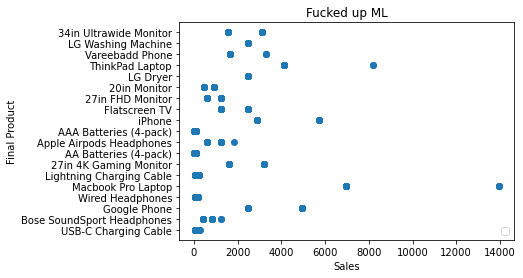

In [78]:
import matplotlib.pyplot as plt

plot = "Sales"
plt.scatter(all_data[plot], all_data["Product"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Product")
plt.title("Fucked up ML")
plt.show()

In [79]:
## KNN algorithm

model = KNeighborsClassifier(n_neighbors=15) #hyperparameter == total items
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
print(acc)

0.9921753159451465


In [80]:
##valuation

predicted = model.predict(x_test)
for x in range(len(predicted)):
    print("predicted value", predicted[x], "feature value", x_test[x], "real product value", y_test[x])

predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 4.    49.036] real product value 5
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 6 feature value [   2. 1230

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 2.    24.518] real product value 5
predic

predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 7 feature value [  2.    819.918] real product value 7
predicted value 13 featu

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature 

predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+0

predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted 

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
pred

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744]

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 2 feature value [  1.    614.959] real product value 2
predicted valu

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted valu

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real p

predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 4 feature value [ 1.    15.744] real product valu

predicted value 6 feature value [  1. 615.] real product value 6
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 4 feature value [ 1.    15.744] real product valu

predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] r

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 0 feature value [  1.    450.959] real product value 0


predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 2.    24.518] real product value 5
pr

predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real pro

predicted value 6 feature value [   2. 1230.] real product value 6
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 2.    24.518] real product value 5
pr

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17

predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 5.    61.295] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted valu

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 0 feature value [  1.    450.959] real product value 0
predicte

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 1 feature value [1.000000e+00 1.598959e+03] real produc

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 5 feature value [ 7.    85.813] real pr

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 4 feature value [ 1.    15.744] real product va

predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real produc

predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
pr

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [  2.   122.59] real product value 12
predic

predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 12 feature value [ 1.    61.295] real product value 12
predicte

predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 17 feature value [ 1.    49.159] real product value 17


predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 0 feature value [  1.    450.959] real product 

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predic

predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] r

predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 0 feature value [  1.    450.959] real product 

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted va

predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 13 feature value

predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 15 feature value [ 1.    48.995] real pro

predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 15 feature value [ 1.    48.995] real

predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real prod

predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value

predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 2 feature value [  1.    614.959] real pr

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 6 feature value [  1. 615.] real product value 

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature 

predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 4 feature value [ 1.    15.744] real 

predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 4.    49.036] real product value 5
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 11
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 4 feature value [ 4.    62.976] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 1.    12.259] real product value

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 4 feature value [ 1.    15.744] real product value 4
predicte

predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 7 feature value [  1.    409.959] real product value 7
pr

predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted 

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [  3.    147.477] real product value 17
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
pr

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product 

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predic

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 15 feature value [ 1.    48.995] real product va

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 2 feature value [  1.    614.959] real 

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 1.    12.259] real product value 5
predicte

predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted valu

predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [  3.    146.985] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 1 feature value [1.000000e+00 1.598959e+0

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 6.    94.464] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [  3.    147.477] real product value 17
predicted value 1 feat

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 2.   97.99] real product value 15
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 18 feature value [2.00e+00 4.92e+03] real product value 9
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 fe

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
pr

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [  3.    147.477] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 1.    12.259] real product 

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 15 feature value [ 1.    48.995] real product val

predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 6 feature value [   2. 1230.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted va

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted 

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 2.    24.518] real product value 5
predic

predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 7 feature value [  2.    819.918] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 featu

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 2.    24.518] real product value 5
pred

predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15


predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7 feature value [  1.    409.959] real product value 7


predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predic

predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predic

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [  2.   122.59] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 2.    98.318] real product value

predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 15 feature

predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 1

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
pr

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted valu

predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product v

predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 17 feature value [  3.    147.477] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 4.    62.976] real product value 4
predicted value 15 feature val

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 18

predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 5 feature value [ 4.    49.036] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted 

predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 1.    12.259] real product value 

predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 1 feature value [1.000000e+00 1.5

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 8 feature value [1.00e+00 1.23e+03] real produc

predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 1

predicted value 14 feature value [1.000000e+00 4.099959e+03] real product value 14
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 8 feature value [1.00e+00 1.23e+03] real product value 8
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 16 feature value [1.00e+00 1.64e+03] real product value 16
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 15 feature value [ 1.    48.995] real product

predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 3.    47.232] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 6 feature value [  1. 615.] real product value 6
predict

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 1 feature value [1.000000e+00 1.598959e+03] r

predicted value 6 feature value [  1. 615.] real product value 6
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 12 feature value [  3.    183.885] real product value 12
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 4 feature value [ 6.    94.464] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 17 feature value [ 2.    98.318] real product value 17
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 7 feature value [  1.    409.959] real product value 7
predicted value 4 feature value [ 1.    15.744] real product value 4
predic

predicted value 9 feature value [1.00e+00 2.46e+03] real product value 10
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 13 feature value [1.00e+00 6.97e+03] real product value 13
predicted value 5 feature value [ 2.    24.518] real product value 5
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 1 feature value [1.000000e+00 1.598959e+03] real product value 1
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 5 feature value [ 3.    36.777] real product value 5
predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 3 feature value [1.000000e+00 1.557959e+03] real product value 3
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 14 feature value [1.000000e+00 4.099959e+03] real 

predicted value 17 feature value [ 1.    49.159] real product value 17
predicted value 2 feature value [  1.    614.959] real product value 2
predicted value 0 feature value [  1.    450.959] real product value 0
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 6 feature value [  1. 615.] real product value 6
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 4 feature value [ 1.    15.744] real product value 4
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted value 18 feature value [1.00e+00 2.87e+03] real product value 18
predicted value 4 feature value [ 2.    31.488] real product value 4
predicted value 12 feature value [ 1.    61.295] real product value 12
predicted value 5 feature value [ 1.    12.259] real product value 5
predicted value 15 feature value [ 1.    48.995] real product value 15
predicted value 9 feature value [1.00e+00 2.46e+03] real product value 9
predicted 

In [90]:
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.193605770593489
RMSE value for k=  2 is: 0.193605770593489
RMSE value for k=  3 is: 0.193605770593489
RMSE value for k=  4 is: 0.19367520067303606
RMSE value for k=  5 is: 0.193605770593489
RMSE value for k=  6 is: 0.193605770593489
RMSE value for k=  7 is: 0.193605770593489
RMSE value for k=  8 is: 0.19367520067303606
RMSE value for k=  9 is: 0.19367520067303606
RMSE value for k=  10 is: 0.19367520067303606
RMSE value for k=  11 is: 0.20461205496197507
RMSE value for k=  12 is: 0.20754781551405732
RMSE value for k=  13 is: 0.20754781551405732
RMSE value for k=  14 is: 0.20754781551405732
RMSE value for k=  15 is: 0.2166751123897729
RMSE value for k=  16 is: 0.2166751123897729
RMSE value for k=  17 is: 0.2166751123897729
RMSE value for k=  18 is: 0.2176656323524558
RMSE value for k=  19 is: 0.21063419774452188
RMSE value for k=  20 is: 0.21063419774452188


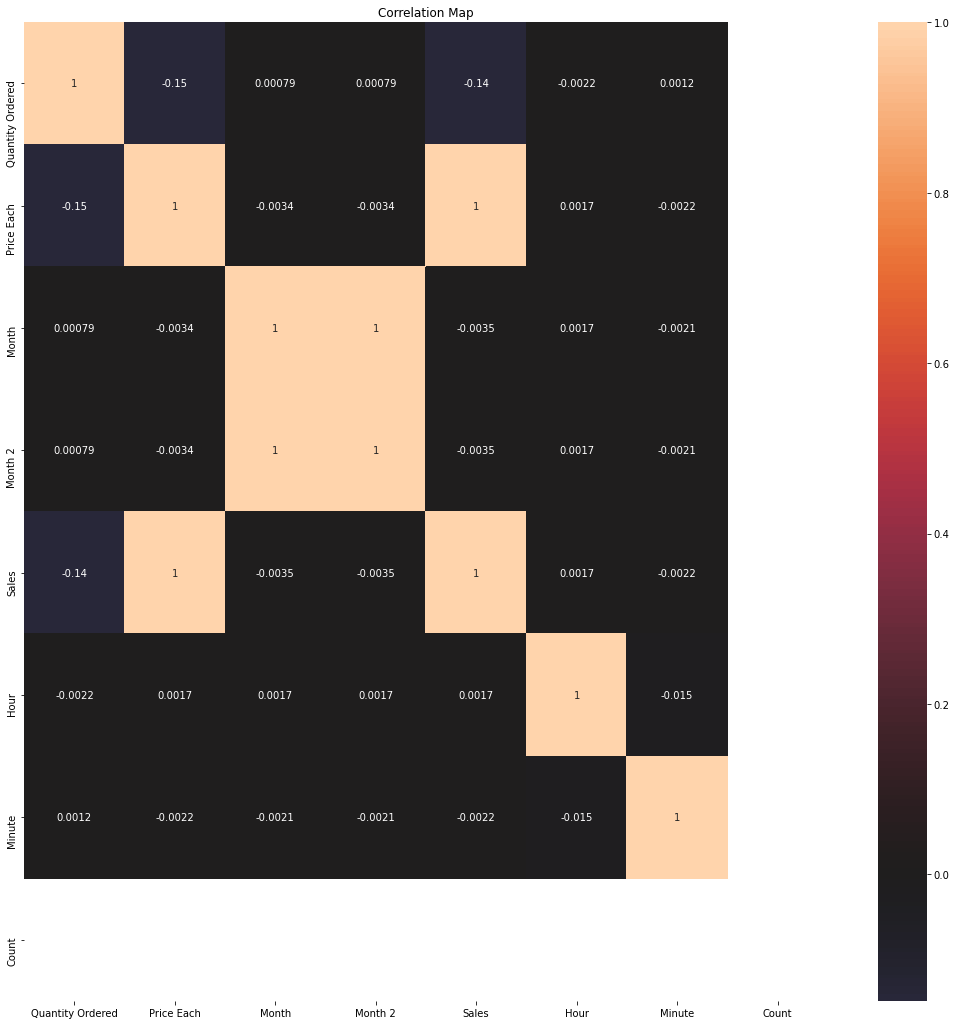

In [81]:
import seaborn as sns                 # Used for plot interactive graph

# To get accurate data visualization remove multi colinearity it means remove the duplicate columns
# Check the correlation between features
# Analysis only for features_mean 
# Visualize correlations by heatmap

plt.figure(figsize = (18, 18))
sns.heatmap(all_data.corr(), center=0, annot=True ) 
plt.title('Correlation Map')
plt.show()

Text(91.68, 0.5, 'predicted class')

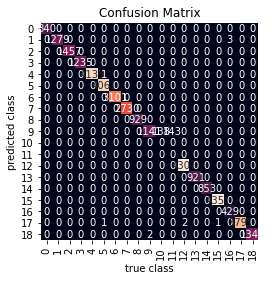

In [83]:
##ACCURACY

# Based on the test values generate the confusion matrix 
from sklearn.metrics import confusion_matrix 

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, predicted) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 

plt.title('Confusion Matrix')
plt.xlabel('true class') 
plt.ylabel('predicted class')



In [ ]:
##sns.pairplot(all_data.drop("Id", axis=1,hue="Product", size=15)

In [ ]:
sns.pairplot(data = all_data["Product"], hue = 'Sales', palette = 'RdBu')